<a href="https://colab.research.google.com/github/hemanth700/Mini-Project/blob/main/Major_flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions --quiet
!pip install vaderSentiment --quiet
!pip install emot --quiet

     |████████████████████████████████| 286kB 5.2MB/s 
     |████████████████████████████████| 327kB 31.1MB/s 
     |████████████████████████████████| 133kB 5.2MB/s 


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imread,imshow,imshow_collection

import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import contractions
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
def get_urls(name):
  links=[]
  products=[]
  img_links=[]
  dic={}

  try :
    name=name.replace(' ','%20')
  except:
    pass

  url='https://www.flipkart.com/search?q='+name+'&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
  print(url)

  page=requests.get(url)
  soup=BeautifulSoup(page.content,"html.parser")

  if soup.findAll("a",attrs={"class":"_1fQZEK"}) != []:
    for link in soup.findAll("a",attrs={"class":"_1fQZEK"}):
      n_link=link.get('href')
      links.append(n_link)
    for link in soup.findAll("img",attrs={"class":"_396cs4 _3exPp9"}):
      n_link=link.get('src')
      img_links.append(n_link)
    for product in soup.findAll("div",attrs={"class":"_4rR01T"}):
      products.append(product.get_text())

  elif soup.findAll("a",attrs={"class":"s1Q9rs"}) != [] :
    for link in soup.findAll("a",attrs={"class":"s1Q9rs"}):
      n_link=link.get('href')
      links.append(n_link)
      products.append(link.get_text())
    for link in soup.findAll("img",attrs={"class":"_396cs4 _3exPp9"}):
      n_link=link.get('src')
      img_links.append(n_link)

  else :
    for link in soup.findAll("a",attrs={"class":"IRpwTa"}):
      n_link=link.get('href')
      links.append(n_link)
    for link in soup.findAll("img",attrs={"class":"_2r_T1I"}):
      n_link=link.get('src')
      img_links.append(n_link)
    for product in soup.findAll("div",attrs={"class":"_2WkVRV"}):
      products.append(product.get_text())

  for i in range(len(links)):
    links[i]="https://www.flipkart.com"+links[i]
    if img_links[i]=='':
      img_links[i]='http://fremontgurdwara.org/wp-content/uploads/2020/06/no-image-icon-2.png'
    dic[products[i]]=[links[i],img_links[i]]
    
  return dic

In [4]:
def get_reviews(new):
  review_link=[]
  reviews=[]
  url=dic[new][0]

  page1=requests.get(url)
  soup=BeautifulSoup(page1.content,"html.parser")
  
  for r in soup.findAll("div",attrs={"class":"t-ZTKy"}):
    reviews.append(r.get_text())
  return reviews

In [5]:
# Remove HTML Tag
def html_tag(text):
  Soup = BeautifulSoup(text,"html.parser")
  new_text = Soup.get_text()
  return new_text

html_tag('<html><h2> some important info </h2></html>')

' some important info '

In [6]:
# Expand Contractions
def con(text):
  expand= contractions.fix(text)
  return expand

con("I don't like you" ) 

'I do not like you'

In [7]:
#Remove Special Characters
def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text

In [8]:
def remove_stopwords(text):

  #creating a stopword list 
  stopword_list = nltk.corpus.stopwords.words('english')
  stopword_list.remove('no')
  stopword_list.remove('not')
  stopword_list.append('read')
  
  len(stopword_list)

  #removing the stop words
  tokenizer = ToktokTokenizer()
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

In [12]:
def convert_emojis(text):
  for emot in UNICODE_EMO:
    text = text.replace(emot,' '.join(UNICODE_EMO[emot].replace(',','').replace(':','').replace('_',' ').split()))
  return text

Enter the product name : shoes
https://www.flipkart.com/search?q=shoes&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
TR
BRUTON
aadi
ASIAN
SWIGGY
CALCADOS
GS
BEEROCK
Airland
T-ROCK
restinfoot
ORICUM
MILESWALKER
Xylus
Abisto
Density
K ' Footlance
CAMPUS
Shoes Bank
Longwalk
Copy the product name : CAMPUS
5Good for that priceREAD MORE

4Amazing shoes thanku campus  big fan❤️READ MORE

5Excellent product..Just go for it.READ MORE

After Preprocessing

5good priceread

4amazing shoes thanku campus big fanread

5excellent product  go itread



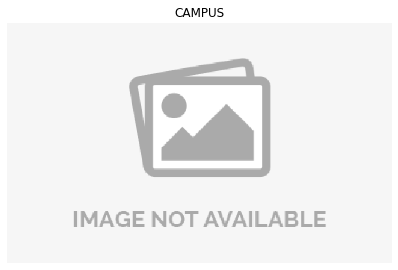

                                            Reviews  Compound Score Emojis
0                     5Good for that priceREAD MORE             0.0      😑
1  4Amazing shoes thanku campus  big fan❤️READ MORE             0.0      😑
2      5Excellent product..Just go for it.READ MORE             0.0      😑


In [14]:
#START OF EXECUTION
name=input('Enter the product name : ')
dic=get_urls(name)
#[print(keys, ':', value) for keys,value in dic.items() ]
[print(key) for key in dic.keys()]
new=input("Copy the product name : ")
reviews=get_reviews(new)

# Done Data Acquisation

for i in reviews:
  print(i)
  print()

processed_reviews=reviews.copy()
for i in range(len(reviews)):
  processed_reviews[i]= reviews[i].lower()
  processed_reviews[i]= remove_stopwords(processed_reviews[i])
  processed_reviews[i]= html_tag(processed_reviews[i])
  processed_reviews[i]= con(processed_reviews[i])
  processed_reviews[i]= remove_sp(processed_reviews[i])
print('After Preprocessing\n')
for i in processed_reviews :
  print(i)
  print()

# Done Preprocessing

Analyze = SentimentIntensityAnalyzer()
compound1=[]
emoji=[]
for x in range(len(processed_reviews)):
  compound1.append(Analyze.polarity_scores(processed_reviews[x])['compound'])
for x in range(len(reviews)):
  if compound1[x]>=0.8:
    emoji.append('\U0001F600')
  elif compound1[x]<0.8 and compound1[x]>0.1:
    emoji.append('\U0001F642')
  elif compound1[x]<=0.1:
    emoji.append('\U0001F611')


image = imread(dic[new][1])
imshow(image)
plt.axis('off')
plt.title(new)
plt.show()
df1 = pd.DataFrame({'Reviews':reviews,
                  'Compound Score': compound1,'Emojis':emoji})
# df2=df1.style.set_properties(**{'text-align':'left'})
if df1.empty :
  print('Reviews Not Available')
else : 
  print(df1)

# Done Sentimental Analysis'''

In [15]:
'''
compound score > 0.5 positive
compound score < -0.5 negative
compound score > -0.5 and compound score < 0.5 neutral
'''

'\ncompound score > 0.5 positive\ncompound score < -0.5 negative\ncompound score > -0.5 and compound score < 0.5 neutral\n'